In [60]:
import cv2
import datetime
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

In [2]:
cap_path = "Starlink Mission.mp4"

In [3]:
cap = cv2.VideoCapture(cap_path)

In [5]:
cap.get(cv2.CAP_PROP_FPS)

30.0

In [6]:
def ms(delta):
    return delta.seconds * 1000 + delta.microseconds / 1000

In [15]:
def frame_to_pil_image(frame):
    cv2_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return Image.fromarray(cv2_img)


def get_frame_at_current_position():
    _, frame = cap.read()
    return frame


def get_image_at_current_position():
    frame = get_frame_at_current_position()
    return frame_to_pil_image(frame)


def get_frame_at_position(ts):
    cap.set(cv2.CAP_PROP_POS_MSEC, ms(ts))
    return get_frame_at_current_position()


def get_image_at_position(ts):
    cap.set(cv2.CAP_PROP_POS_MSEC, ms(ts))
    return get_image_at_current_position()

In [75]:
launch_ts = datetime.timedelta(minutes=12, seconds=55)
meco_ts = datetime.timedelta(minutes=15, seconds=29)
s2_first_telemetry_ts = datetime.timedelta(minutes=15, seconds=46)


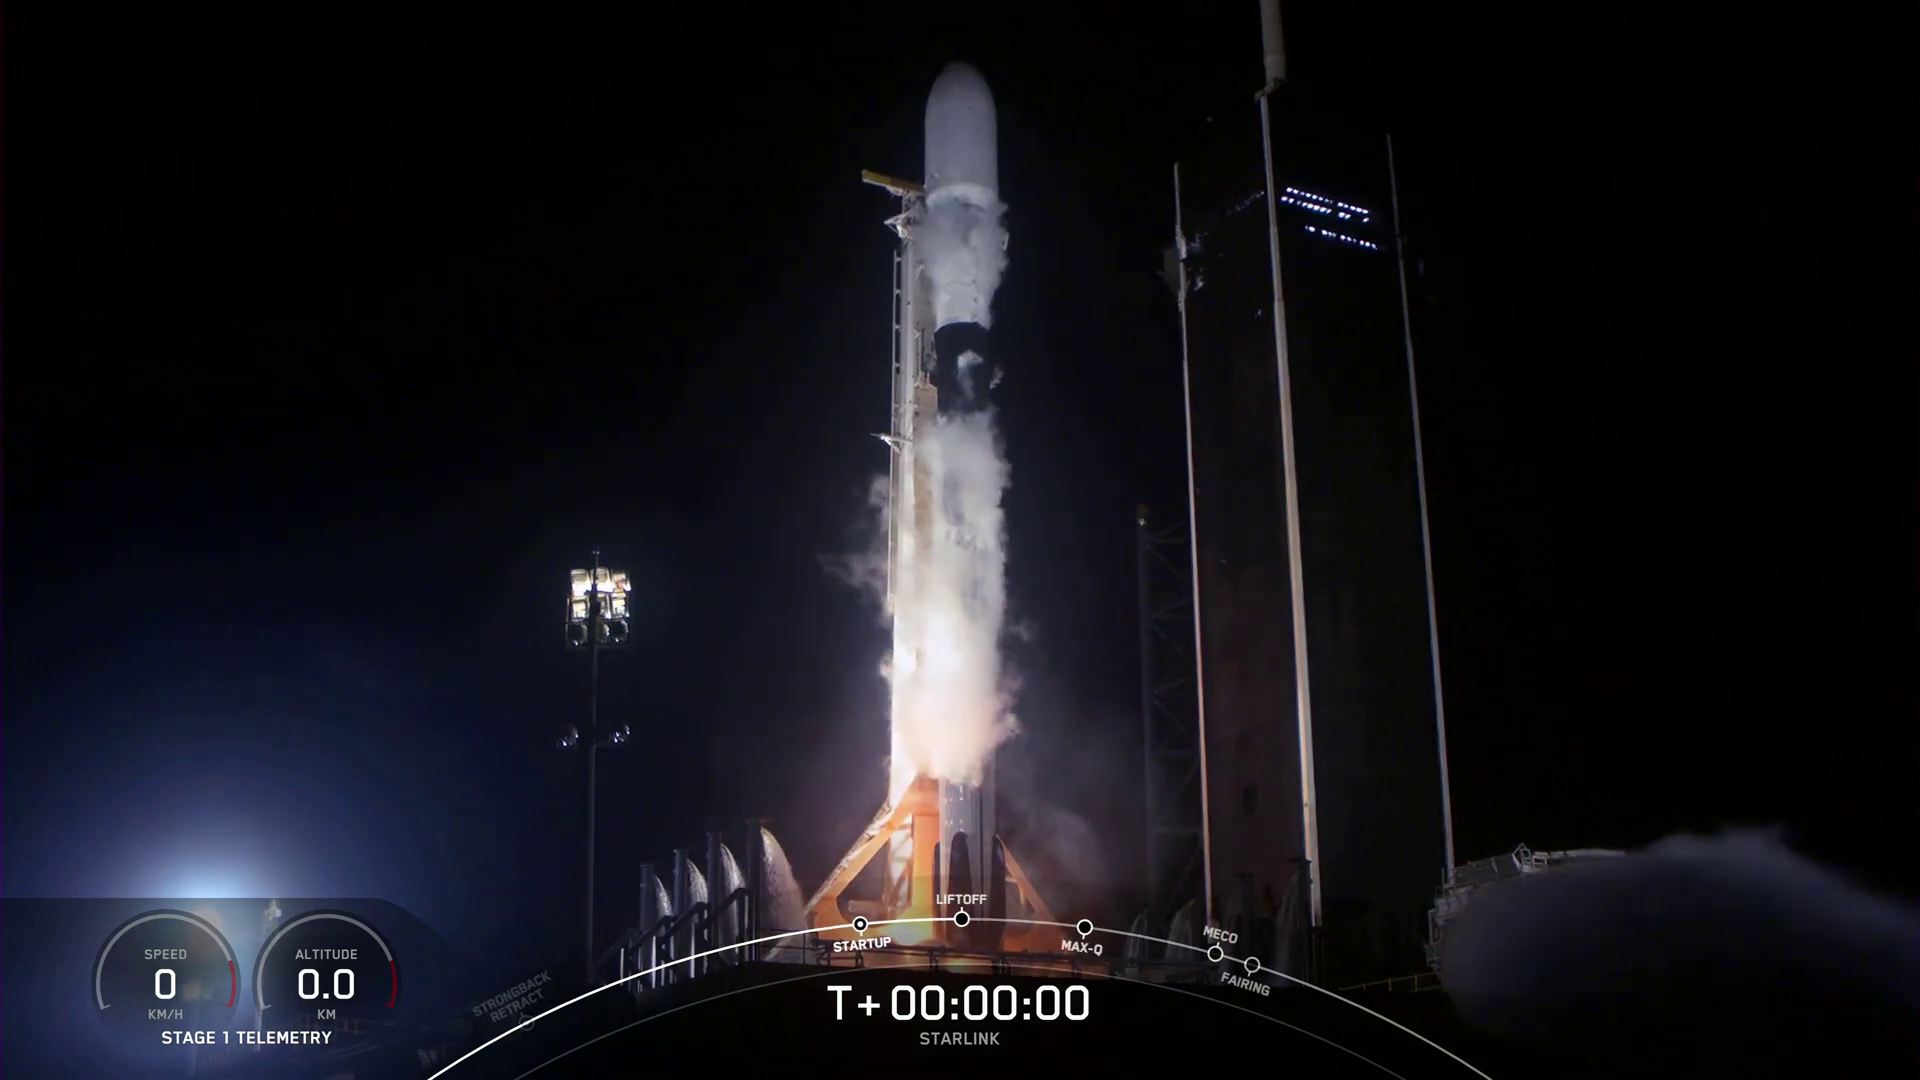

In [17]:
img = get_image_at_position(launch_ts)
img

In [12]:
type(img)

PIL.Image.Image

In [33]:
def resize_img(cv2_img, scale):
  width = int(cv2_img.shape[1] * scale)
  height = int(cv2_img.shape[0] * scale)
  dim = (width, height)
  return cv2.resize(cv2_img, dim, interpolation = cv2.INTER_AREA)

In [38]:
rects = [
  ((118,34),(108,967), "stage1-speed"),
  ((118,34),(265,967), "stage1-altitude"),
  ((118,34),(1529,967), "stage2-speed"),
  ((118,34),(1687,967), "stage2-altitude"),
]

## preview of crop boxes on top of image

Original Dimensions :  (1080, 1920, 3)
Resized Dimensions :  (540, 960, 3)


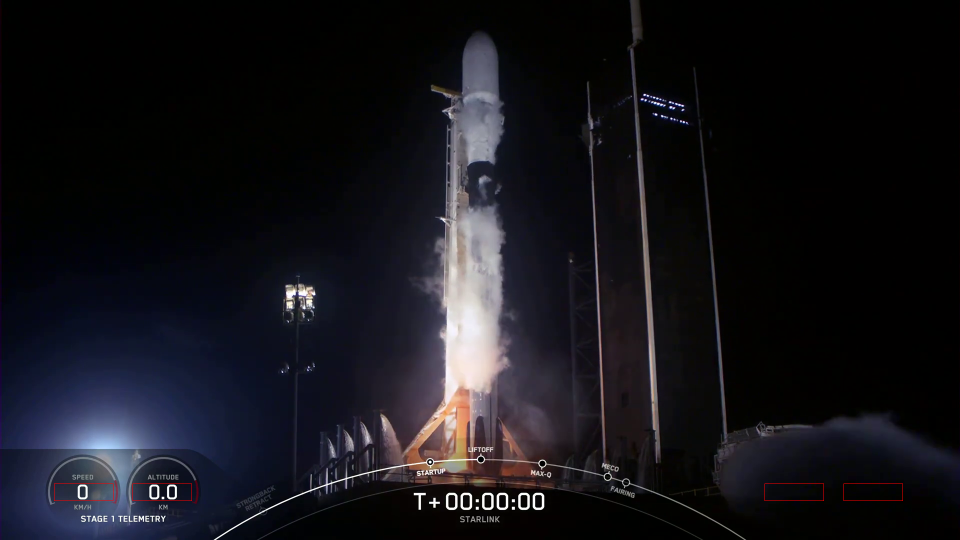

In [44]:
frame = get_frame_at_position(launch_ts)
cv2_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
for ((w,h), (x,y), name) in rects:
  cv2_img2 = cv2.rectangle(cv2_img, (x, y), (x+w, y+h), (255,0,0))


print('Original Dimensions : ', cv2_img2.shape)
resized = resize_img(cv2_img2, 0.5)
print('Resized Dimensions : ', resized.shape)

Image.fromarray(resized)

In [40]:
def extract_regions_from_image(cv2_img):
  res = {}
  for ((w,h), (x,y), name) in rects:
    res[name] = cv2_img[y:y+h, x:x+w]

  return res

In [68]:
def plot_regions_at_ts(ts):
  frame = get_frame_at_position(ts)
  cv2_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  regions = extract_regions_from_image(cv2_img)

  # figure size in inches optional

  rcParams['figure.figsize'] = 6, 3
  fig, ((ax_s1_v, ax_s1_h), (ax_s2_v, ax_s2_h)) = plt.subplots(2,2)

  axs = [ax_s1_v, ax_s1_h, ax_s2_v, ax_s2_h]
  names = ["stage1-speed", "stage1-altitude", "stage2-speed", "stage2-altitude"]

  for (ax, name) in zip(axs, names):
    ax.imshow(Image.fromarray(regions[name]))
    ax.axis("off")
    ax.set_title(name)

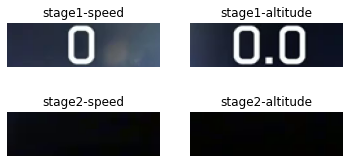

In [69]:
plot_regions_at_ts(launch_ts)

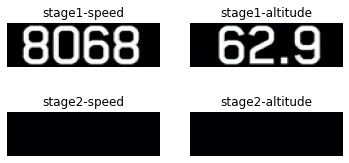

In [72]:
plot_regions_at_ts(meco_ts)

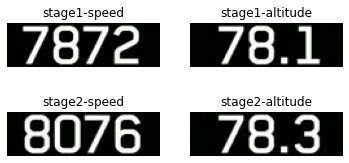

In [76]:
plot_regions_at_ts(s2_first_telemetry_ts)

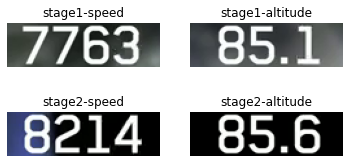

In [77]:
fairing_deploy_bad_quality = datetime.timedelta(minutes=15, seconds=55)
plot_regions_at_ts(fairing_deploy_bad_quality)

## talk to tesseract